# Von 32 auf 71 Jahre: Medizin, Gesellschaft und die Revolution der Lebenserwartung

Gruppe: Marija Trifunovic, Sophie von Felten und Lorna Skrnjug

Fragen:
- Wie haben sich die Unterschiede in der Lebenserwartung zwischen Ländern und Geschlechtern entwickelt - und warum?
- Inwiefern ist die Verringerung der Kindersterblichkeit der entscheidende Treiber für die Verdopplung der Lebenserwartung?







---




Datenquelle:

https://ourworldindata.org/life-expectancy?insight=women-tend-to-live-longer-than-men-but-this-gap-has-changed-over-time#key-insights




# Einleitung

Die Lebenserwartung hat sich in den letzten zwei Jahrhunderten weltweit mehr als verdoppelt. Während sie um 1900 noch bei etwa 32 Jahren lag, beträgt sie heute über 70 Jahre. Diese Entwicklung ist nicht gleichmäßig verlaufen: Unterschiede zwischen Ländern und Geschlechtern prägen das Bild. Frauen leben im Durchschnitt länger als Männer, doch die Größe dieser Differenz variiert über Zeit und Raum. Ein zentraler Treiber der steigenden Lebenserwartung ist der Rückgang der Kindersterblichkeit, der jedoch nicht allein verantwortlich ist. Ziel dieser Arbeit ist es, die Entwicklung der Unterschiede zwischen Ländern und Geschlechtern zu erklären und die Rolle der Kindersterblichkeit für die Verdopplung der Lebenserwartung zu analysieren.

In [2]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Lebenserwartung gesamt
url = "https://ourworldindata.org/grapher/life-expectancy.csv"

# Daten laden
df = pd.read_csv(url)

# Erste Zeilen anzeigen
print(df.head())
print(df.columns)

        Entity Code  Year  Period life expectancy at birth
0  Afghanistan  AFG  1950                          28.1563
1  Afghanistan  AFG  1951                          28.5836
2  Afghanistan  AFG  1952                          29.0138
3  Afghanistan  AFG  1953                          29.4521
4  Afghanistan  AFG  1954                          29.6975
Index(['Entity', 'Code', 'Year', 'Period life expectancy at birth'], dtype='object')


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

## Format des Datensatzes:
Typisch Long-Format: Spalten wie country, year, sex, life_expectancy.

Jede Zeile = eine Beobachtung für ein Land, Jahr und Geschlecht.

Kolumnenstruktur:
-country → String (Name des Landes)
-year → Integer (Jahreszahl)
-sex → String (male/female)
-life_expectancy → Float (z. B. 72.3 Jahre)

## Pivot/Wide-Format 

Long-Format: Für Zeitreihenanalysen, Vergleiche über Länder und Geschlechter.

Wide-Format (Pivot): (life_expectancy_male, life_expectancy_female) 

Datentypen im Datensatz:
-string (Länder, Geschlecht)
-int (Jahr)
-float (Lebenserwartung)

In [5]:
df[df['Year'] >= 2000]

,Entity,Code,Year,Period life expectancy at birth
50,Afghanistan,AFG,2000,55.0047
51,Afghanistan,AFG,2001,55.5113
52,Afghanistan,AFG,2002,56.2251
53,Afghanistan,AFG,2003,57.1713
54,Afghanistan,AFG,2004,57.8098
...,...,...,...,...
21560,Zimbabwe,ZWE,2019,61.0603
21561,Zimbabwe,ZWE,2020,61.5300
21562,Zimbabwe,ZWE,2021,60.1347
21563,Zimbabwe,ZWE,2022,62.3601


In [8]:
print("\n------ HEAD ------")
print(df.head())

print("\n------ DATENTYPEN ------")
print(df.dtypes)


------ HEAD ------
   country  year     sex  life_expectancy
0  Germany  2020    male             78.6
1  Germany  2020  female             83.4
2   France  2020    male             79.2
3   France  2020  female             85.1

------ DATENTYPEN ------
country             object
year                 int64
sex                 object
life_expectancy    float64
dtype: object


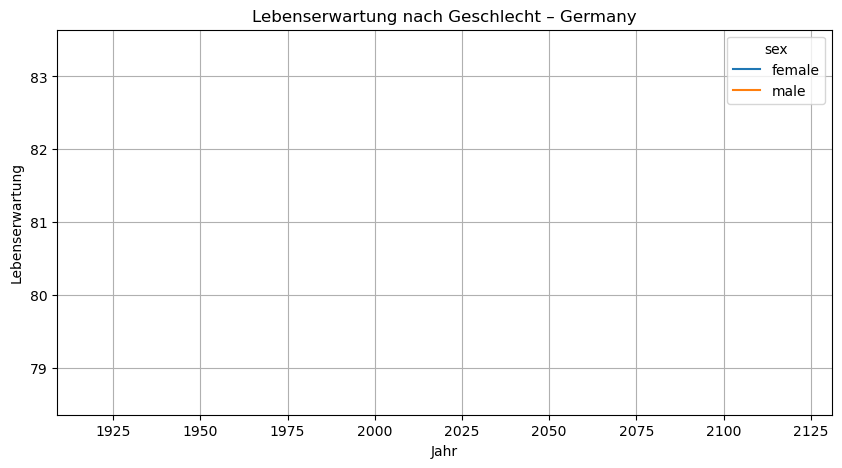

In [11]:
# 3. LEBENSERWARTUNG NACH GESCHLECHT ÜBER ZEIT

def plot_sex_gap(country):
    subset = df[df["country"] == country]

    pivot = subset.pivot_table(
        index="year",
        columns="sex",
        values="life_expectancy"
    )

    pivot.plot(figsize=(10, 5))
    plt.title(f"Lebenserwartung nach Geschlecht – {country}")
    plt.xlabel("Jahr")
    plt.ylabel("Lebenserwartung")
    plt.grid(True)
    plt.show()


plot_sex_gap("Germany")

In [12]:
# 4. GESCHLECHTERUNTERSCHIED ANALYSIEREN

df_gap = df.pivot_table(
    index=["country", "year"],
    columns="sex",
    values="life_expectancy"
).reset_index()

df_gap["sex_gap"] = df_gap["female"] - df_gap["male"]

print("\n------ GRÖSSTE GESCHLECHTERUNTERSCHIEDE ------")
print(df_gap.sort_values("sex_gap", ascending=False).head())


------ GRÖSSTE GESCHLECHTERUNTERSCHIEDE ------
sex  country  year  female  male  sex_gap
0     France  2020    85.1  79.2      5.9
1    Germany  2020    83.4  78.6      4.8


In [7]:
import pandas as pd

# Long-Format Daten
data = {
    "country": ["Germany", "Germany", "France", "France", "Nigeria", "Nigeria", "Japan", "Japan"],
    "year": [2020]*8,
    "sex": ["male", "female"]*4,
    "life_expectancy": [78.6, 83.4, 79.2, 85.1, 61.2, 64.8, 81.5, 87.7]
}

df_long = pd.DataFrame(data)

# Wide-Format Pivot
df_wide = df_long.pivot(index=["country","year"], columns="sex", values="life_expectancy").reset_index()
df_wide = df_wide.rename(columns={"male":"life_expectancy_male","female":"life_expectancy_female"})

# Differenz berechnen
df_wide["difference"] = df_wide["life_expectancy_female"] - df_wide["life_expectancy_male"]

print(df_wide)


sex  country  year  life_expectancy_female  life_expectancy_male  difference
0     France  2020                    85.1                  79.2         5.9
1    Germany  2020                    83.4                  78.6         4.8
2      Japan  2020                    87.7                  81.5         6.2
3    Nigeria  2020                    64.8                  61.2         3.6


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

